# Import PDB structure to `DirectCoordinateProjector`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tme

from mosaics.reference_template.projector import DirectCoordinateProjector
from mosaics.reference_template.projector import FourierSliceProjector
from mosaics.filters.exposure_filter import apply_cumulative_exposure_filter

np.set_printoptions(precision=3)

## Importing a template PDB structure for MOSAICS

MOSAICS uses the pyTME package ((CITE)) to parse a Protein Data Bank file into a `Structure` object which holds a set of 3-dimensional atomic coordinates, atomic identities, and B-factors for a structure.
pyTME also allows manipulation of `Structure` objects, including centering the structure by mass as show below.
More advanced use of the `Structure` object is shown later in these examples to generate masked portions of reference templates.

In [3]:
pdb_path = "/Users/mgiammar/Documents/MOSAICS/docs/_static/1mh1.pdb"

# Load the structure
structure = tme.Structure.from_file(pdb_path)
display(structure)

# Center the structure by mass
mass_center = structure.center_of_mass()
print(f"Original mass center:\n\t{mass_center}")

structure = structure.rigid_transform(
    translation=-mass_center, rotation_matrix=np.eye(3)
)

mass_center = structure.center_of_mass()
print(f"New mass center:\n\t{mass_center}")

Structure object at 4446807440
Unique Chains: A, Atom Range: 1-1395 [N = 1395], Residue Range: 1-181 [N = 181]

Original mass center:
	[ 4.506 34.825 10.07 ]
New mass center:
	[ 6.068e-07 -3.810e-05 -9.946e-07]


## Create a `DirectCoordinateProjector` object

Projections of the reference structure for the `DirectCoordinateProjector` class are generated via rotating and projecting the atomic coordinates in real space.
To instantiate a `DirectCoordinateProjector`, three sets of information about the reference template are needed:
1) The 3D coordinates of each atom,
2) The atomic identities of each atom, and
3) The temperature factors (B-factors) for each atom.

Additional information on the shape of the desired projection and pixel size of the projection are necessary.

In [4]:
pixel_size = 0.5
projection_shape=(160, 160)

atom_coordinate = structure.atom_coordinate
atomic_identities = structure.element_symbol
b_factor = structure.temperature_factor

# Instantiate the objet to project the structure
direct_projector = DirectCoordinateProjector(
    pixel_size=pixel_size,
    projection_shape=projection_shape,
    atomic_coordinates=atom_coordinate,
    atomic_identities=atomic_identities,
    b_factors=b_factor,
)

## Plot the direct coordinate projection results

The following code generates a real-space projection of the reference structure taking into account the atom identities and b-factors.
On the left is the structure if it has been perfectly projected (no "blurring" from radiation damage), and on the right is the expected projection with an exposure filter applied to model the decay of spatial frequencies.

In [9]:
phi = np.deg2rad(10)
theta = np.deg2rad(55)
psi = np.deg2rad(15)

dc_projection = direct_projector.get_real_space_projection(phi, theta, psi)
dc_projection_filtered = apply_cumulative_exposure_filter(
    dc_projection, pixel_size, exposure_start=0.0, exposure_end=35.0
)

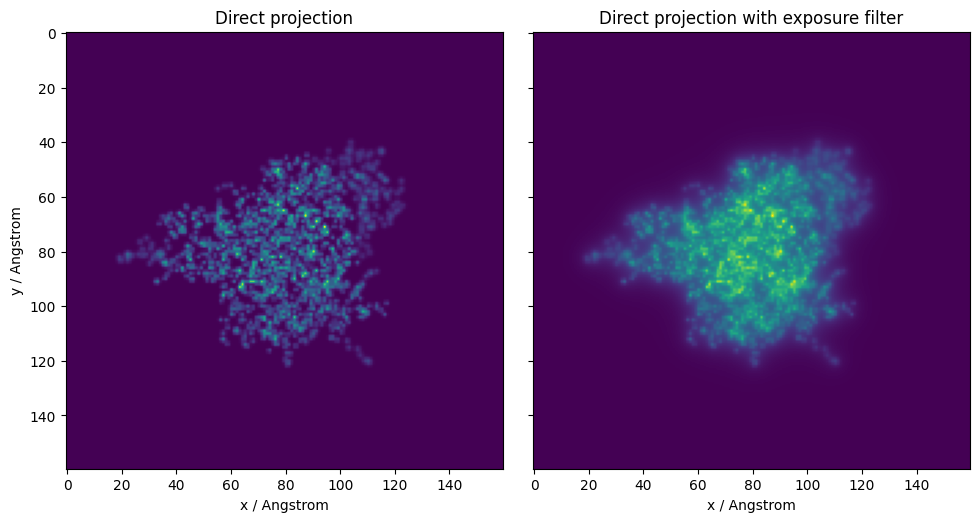

In [16]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].imshow(dc_projection, cmap="viridis")
ax[0].set_title("Direct projection")

ax[1].imshow(dc_projection_filtered, cmap="viridis")
ax[1].set_title("Direct projection with exposure filter")

ax[0].set_ylabel("y / Angstrom")
ax[0].set_xlabel("x / Angstrom")
ax[1].set_xlabel("x / Angstrom")

plt.tight_layout()
plt.show()